<a href="https://colab.research.google.com/github/chonholee/tutorial/blob/main/bigdata/BigDataII_13_mediapipe.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
from google.colab import drive
drive.mount('/content/drive/')
%cd '/content/drive/MyDrive/Lecture_BigData'

# MediaPipe Pose Landmark Detection API in Python

骨格点抽出

 (参照 http://solutions.mediapipe.dev/pose).

In [ ]:
!pip install numpy==1.19.3
!pip install mediapipe

In [ ]:
from google.colab import files

uploaded = files.upload()

soccer.jpg


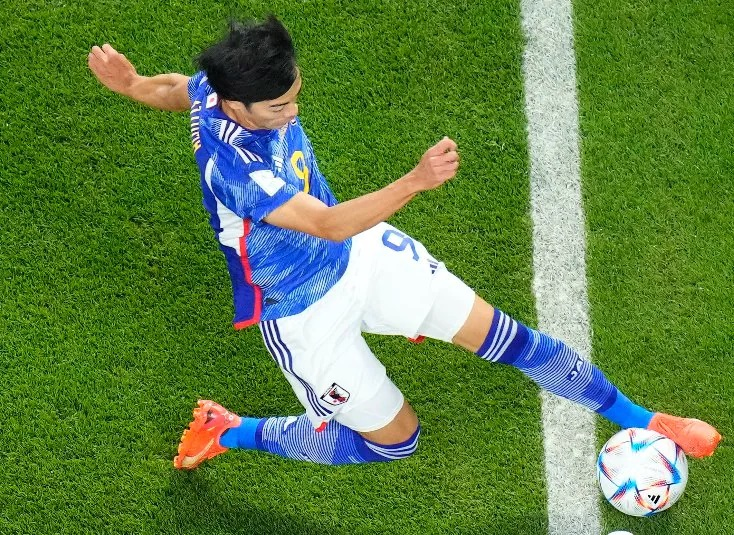

In [10]:
import cv2
from google.colab.patches import cv2_imshow
import numpy as np

# Read images with OpenCV.
images = {name: cv2.imread(name) for name in uploaded.keys()}

# Preview the images.
for name, image in images.items():
  print(name)   
  cv2_imshow(image)

In [ ]:
import mediapipe as mp
mp_pose = mp.solutions.pose

help(mp_pose.Pose)

# MediaPipe Pose 初期化
pose = mp_pose.Pose(
    static_image_mode=True, min_detection_confidence=0.5
)

# Prepare DrawingSpec for drawing the face landmarks later.
mp_drawing = mp.solutions.drawing_utils 
drawing_spec = mp_drawing.DrawingSpec(thickness=2, circle_radius=2, color=(0,0,255))

for name, image in images.items():
  # Convert the BGR image to RGB and process it with MediaPipe Pose.
  results = pose.process(cv2.cvtColor(image, cv2.COLOR_BGR2RGB))
  # Print nose landmark.
  image_hight, image_width, _ = image.shape
  if not results.pose_landmarks:
    continue
  print(
    f'Nose coordinates: ('
    f'{results.pose_landmarks.landmark[mp_pose.PoseLandmark.NOSE].x * image_width}, '
    f'{results.pose_landmarks.landmark[mp_pose.PoseLandmark.NOSE].y * image_hight})'
  )

  # Draw pose landmarks.
  print(f'Pose landmarks of {name}:')
  annotated_image = image.copy()
  mp_drawing.draw_landmarks(
      image=annotated_image,
      landmark_list=results.pose_landmarks,
      connections=mp_pose.POSE_CONNECTIONS,
      landmark_drawing_spec=drawing_spec,
      connection_drawing_spec=drawing_spec)
  cv2_imshow(annotated_image)